In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression 
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
%matplotlib inline

In [3]:
df_1 = pd.read_csv('user1_data.csv')
df_2 = pd.read_csv('user2_data.csv')

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19341 entries, 0 to 19340
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   19341 non-null  object 
 1   pm1     19341 non-null  float64
 2   pm2     19341 non-null  float64
 3   pm3     19341 non-null  float64
 4   am      19341 non-null  float64
 5   sm      19341 non-null  float64
 6   st      19341 non-null  float64
 7   lum     19341 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   20166 non-null  object 
 1   pm1     20166 non-null  float64
 2   pm2     20166 non-null  float64
 3   pm3     20166 non-null  float64
 4   am      20166 non-null  float64
 5   sm      20166 non-null  float64
 6   lum     20166 non-null  float64
 7   temp    20166 non-null  float64
 8   humd    20166 non-null  float64
 9   pres    20166 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [6]:
# sns.heatmap(df_1.corr())

In [7]:
df_1.head()

ttime   pm1  pm2  pm3   am      sm     st      lum
0  2022-07-18 15:42:55  3.63  0.0  0.0  3.2  7813.0  25.65  15001.0
1  2022-07-18 15:47:55  4.19  0.0  0.0  4.8  7692.0  25.66  13863.0
2  2022-07-18 15:52:55  4.74  0.0  0.0  4.0  7813.0  25.67  13788.0
3  2022-07-18 15:57:55  5.30  0.0  0.0  4.8  7813.0  25.68  14383.0
4  2022-07-18 16:02:55  0.55  5.3  5.3  3.2  7813.0  25.69  14621.0

In [8]:
## plots
# sns.scatterplot(df_2['sm'])
# sns.scatterplot(df_1['sm'])

In [9]:
# df_1.drop('ttime',axis=1,inplace=True)
df_1.columns

Index(['ttime', 'pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [68]:
X = df_1.drop(['sm','ttime'],axis=1)
y = df_1["sm"]

In [69]:
# # Linear Regression
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(X_train,y_train)
# predictions = lm.predict(X_test)

# ## Plots
# # plt.scatter(y_test,predictions)

# #  Evaluation Metrics
# from sklearn import metrics
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 1746.1936176175564
Root Mean Squared Error: 1931.6974186003265


In [383]:
# # LGBM Regressor

# from lightgbm import LGBMRegressor

# horizon = 25
    
# X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
# y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]


# model = LGBMRegressor(random_state=42)
# model.fit(X_train,y_train)
# predictions=model.predict(X_test)

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 12.180156944162222
Mean Squared Error: 15.210097486008056


In [316]:
# # model.predict()
# # 
# # 
# abs(model.predict(X)-y)


0        2538.963190
1        2375.408312
2        2496.408312
3        2496.408312
4         210.806313
            ...     
19336       5.952427
19337       4.952427
19338       5.952427
19339       5.952427
19340       4.937987
Name: sm, Length: 19341, dtype: float64

In [317]:
# ## PLSRegression

# from sklearn.cross_decomposition import PLSRegression 
# model = PLSRegression(n_components=4)

# horizon = 25

# X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
# y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

# model.fit(X_train,y_train)
# predictions=model.predict(X_test)

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 1414.0793595542036
Mean Squared Error: 1425.5525297354152


In [318]:
# # Random Forest

# from sklearn.model_selection import train_test_split


# X = df_1.drop(['sm','ttime'], axis=1)
# y = df_1['sm']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics

# model = RandomForestRegressor(max_depth=2, random_state=0)
# model.fit(X, y)
# predictions = model.predict(X_test)

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))


Mean Absolute Error: 384.6741005487055
Mean Squared Error: 647.3186565621697


In [4]:
# # Neural Network
# # import tensorflow as tf
# # print("Importing ...")
# # print("Imported")

# # Normalize the data

# X = df_2.drop(['sm','ttime'], axis=1)
# y = df_2['sm']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


# x_train = tf.keras.utils.normalize(X_train , axis=1)
# x_test = tf.keras.utils.normalize(X_test , axis=1)

# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(15,activation='relu'))

# model.add(tf.keras.layers.Dense(30,activation='relu'))

# model.add(tf.keras.layers.Dense(25,activation='relu'))

# model.add(tf.keras.layers.Dense(1,activation='relu'))

# model.compile(loss='mse',optimizer='adam')

# model.fit(x_train,y_train,epochs = 250)

# model.save('soil.model')

In [319]:
model = tf.keras.models.load_model('soil.model')
# loss, accuracy = model.evaluate(X_test,y_test)

In [3]:
# model.evaluate(x_test,y_test)

In [113]:
# # LSTM 
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, LSTM




# features = df_2.drop('ttime',axis=1)
# # print(features.shape)

# training_dataset_length = math.ceil(len(features) * .75)
# # print(training_dataset_length)

# #Scale all of the data to be values between 0 and 1
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(features)

# train_data = scaled_data[0:training_dataset_length , : ]

# #Splitting the data
# x_train=[]
# y_train = []
# for i in range(10, len(train_data)):
#     x_train.append(train_data[i-1:i,4])
#     y_train.append(train_data[i,4])
    
# #Convert to numpy arrays
# x_train, y_train = np.array(x_train), np.array(y_train)
# #Reshape the data into 3-D array
# x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))    

# from keras.layers import Dropout
# # Initialising the RNN
# model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# # Adding a second LSTM layer and Dropout layer
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a third LSTM layer and Dropout layer
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a fourth LSTM layer and and Dropout layer
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# # Adding the output layer
# # For Full connection layer we use dense
# # As the output is 1D so we use unit=1
# model.add(Dense(units = 1))


# #compile and fit the model on 30 epochs
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# model.fit(x_train, y_train, epochs =30, batch_size = 1000)

# # model.save("LSTM.model")




In [114]:
# #Test data set
# # test_data = scaled_data[training_dataset_length - 10: , : ]
# #splitting the x_test and y_test data sets
# x_test = []
# y_test = df_2.drop('ttime',axis=1)['sm'].to_numpy()[training_dataset_length : ]
# for i in range(10,len(test_data)):
#     x_test.append(test_data[i-1:i,4])
# #Convert x_test to a numpy array
# x_test = np.array(x_test)
# #Reshape the data into 3-D array
# x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [115]:

# #check predicted values
# predictions = model.predict(x_test)
# # Undo scaling
# # predictions = scaler.inverse_transform(predictions)
# # predictions = predictions.reshape((predictions.shape[0], -1))
# # #Calculate RMSE score

# # rmse=np.sqrt(np.mean((([:,4]- y_test[:,4])**2)))



# # rmse

In [57]:
predictions = scaler.inverse_transform(predictions)
predictions = predictions.reshape((predictions.shape[0], -1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))


Mean Squared Error: 368.7440618480433


In [66]:
predictions[0]


array([0.07863206], dtype=float32)

In [141]:
 df_1.columns[1:]

# [0,1,2,3,5,6]

Index(['pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [12]:
# LSTM 


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

input_fetaure_index=[2,4,5]
no_of_features= len(input_fetaure_index)
target_index = 4
in_days=20


In [13]:


df = df_1.drop('ttime',axis=1)

fraction = math.ceil(len(df) * .75)

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(df)

train_data = scaled_data[0:fraction , : ]


In [14]:
#Splitting the data

x_train=[]
y_train = []
for i in range(in_days, len(train_data)):
    x_train.append(train_data[i-in_days:i,input_fetaure_index])
    y_train.append(train_data[i,target_index])
    
    
    
x_train, y_train = np.array(x_train), np.array(y_train)    
    

In [24]:

model = Sequential()
model.add(LSTM(units = 64, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.5))

model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 64))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 2, batch_size = 500)


Epoch 1/2
29/29 [==============================] - 14s 179ms/step - loss: 0.0762
Epoch 2/2
29/29 [==============================] - 7s 228ms/step - loss: 0.0104


In [25]:
test_data = scaled_data[fraction - in_days: , : ]


x_test = []
y_test = df_1.drop('ttime',axis=1)['sm'].to_numpy()[fraction : ]
for i in range(in_days,len(test_data)):
    x_test.append(test_data[i-in_days:i,input_fetaure_index])

    
    
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],no_of_features))

In [26]:
predictions = model.predict(x_test)

temp = df_1.drop('ttime', axis=1).values
predictions = np.concatenate((temp[fraction:, :target_index],predictions, temp[fraction:, target_index+1:]), axis=1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, target_index]

152/152 [==============================] - 6s 12ms/step


Mean Squared Error: 409.26641806771386


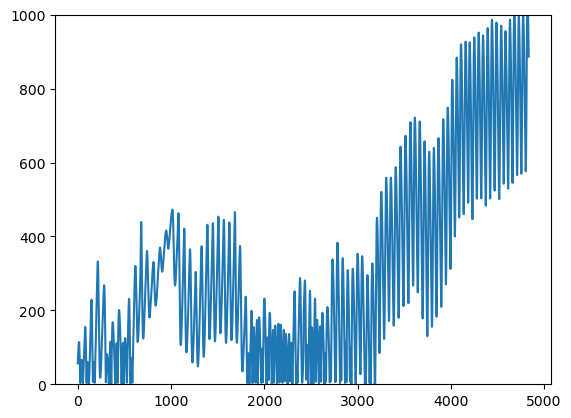

In [27]:

print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))


plt.ylim([0,1000])
plt.plot(abs(y_test-predictions))

# model.save("BestModelAsOfNow.model")

In [23]:
# from keras.layers import Dropout

# model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
# # model.add(Dropout(0.02))

# model.add(LSTM(units = 70, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
# # model.add(Dropout(0.02))

# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
# # model.add(Dropout(0.02))

# model.add(LSTM(units = 50))
# # model.add(Dropout(0.02))

# model.add(Dense(1, activation='relu'))

# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
df_1.corr()['sm'] #pm2 pm3 pm1

pm1    0.441345
pm2    0.728241
pm3    0.730132
am     0.148441
sm     1.000000
st    -0.173479
lum    0.082105
Name: sm, dtype: float64

In [36]:
df_2.corr()['sm'] #pm2 pm3 humd

pm1     0.428794
pm2     0.702341
pm3     0.712649
am     -0.430970
sm      1.000000
lum     0.089096
temp    0.045897
humd    0.545820
pres   -0.637177
Name: sm, dtype: float64

In [42]:
# AR

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# Load your data as a pandas dataframe
df = pd.read_csv('user2_data.csv')

# Convert the date column to a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['ttime'])
df.set_index('Date', inplace=True)


In [43]:
df

ttime   pm1   pm2    pm3   am      sm  \
Date                                                                       
2022-07-18 15:39:58  2022-07-18 15:39:58  0.83  0.00   0.00  0.0  7463.0   
2022-07-18 15:44:55  2022-07-18 15:44:55  1.39  0.00   0.00  0.0  7576.0   
2022-07-18 15:49:55  2022-07-18 15:49:55  1.95  0.00   0.00  0.0  7576.0   
2022-07-18 15:54:55  2022-07-18 15:54:55  2.51  0.00   0.00  0.0  7463.0   
2022-07-18 15:59:56  2022-07-18 15:59:56  0.55  2.51   2.51  0.0  7463.0   
...                                  ...   ...   ...    ...  ...     ...   
2023-03-10 08:59:16  2023-03-10 08:59:16  0.55  1.11  27.38  3.2   327.0   
2023-03-10 09:27:12  2023-03-10 09:27:12  1.11  1.11  27.38  3.2   327.0   
2023-03-10 09:55:12  2023-03-10 09:55:12  1.67  1.11  27.38  4.8   327.0   
2023-03-10 10:23:12  2023-03-10 10:23:12  0.55  1.67  27.93  4.0   327.0   
2023-03-10 10:51:14  2023-03-10 10:51:14  1.11  1.67  27.93  2.4   328.0   

                         lum   temp   humd      pres  
Date                                                  
2022-07-18 15:39:58   6547.0  23.02  90.57  92849.25  
2022-07-18 15:44:55  10249.0  23.47  88.37  92848.31  
2022-07-18 15:49:55  12636.0  23.64  85.26  92844.82  
2022-07-18 15:54:55   8318.0  23.62  85.93  92834.94  
2022-07-18 15:59:56   4149.0  23.82  86.06  92815.25  
...                      ...    ...    ...       ...  
2023-03-10 08:59:16   6352.0  27.04  32.24  93560.72  
2023-03-10 09:27:12   7057.0  28.53  28.69  93574.12  
2023-03-10 09:55:12   7661.0  30.07  24.39  93571.75  
2023-03-10 10:23:12   8386.0  31.55  22.99  93558.36  
2023-03-10 10:51:14   8954.0  32.68  20.85  93541.99  

[20166 rows x 10 columns]

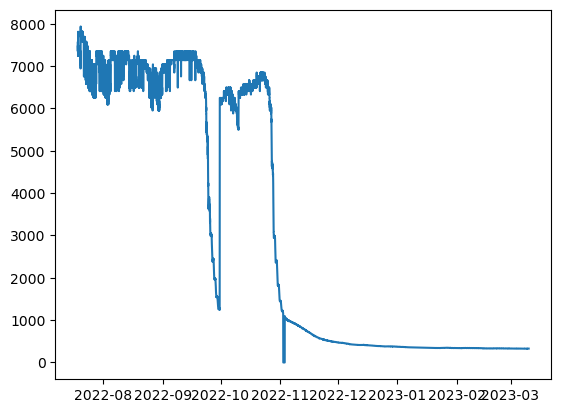

In [45]:

# Plot the data to visualize any trends and seasonality
plt.plot(df['sm'])
plt.show()



In [46]:
# Use the Dicky-Fuller test to check if the data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['sm'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] > 0.05:
    print('Data is not stationary')
else:
    print('Data is stationary')


ADF Statistic: -0.960206
p-value: 0.767500
Data is not stationary


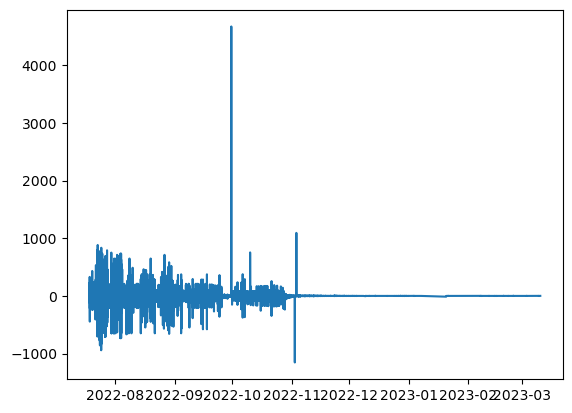

In [49]:

# Perform differencing to make the data stationary
diff = df['sm'].diff().dropna()

# Plot the differenced data
plt.plot(diff)
plt.show()



In [52]:
from statsmodels.tsa.arima.model import ARIMA
# # Fit an ARIMA model with the differenced data
model = ARIMA(diff, order=(1, 0, 0)) # Example of an AR(1) model
# model_fit = model.fit(disp=0)
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


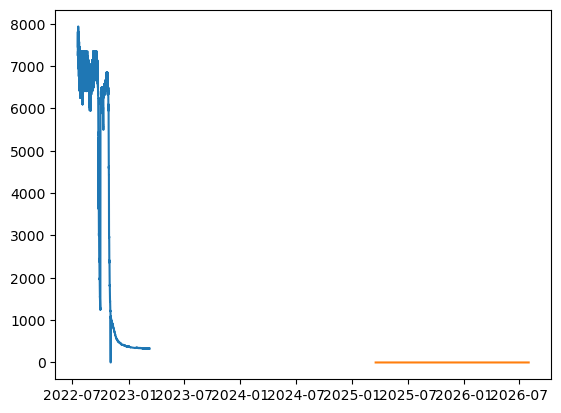

In [61]:
n_periods = 500

# Make predictions and plot them against the original data
predictions = model_fit.predict(start=len(diff), end=len(diff)+n_periods)
plt.plot(df['sm'])
plt.plot(predictions)
plt.show()

In [325]:
# import pandas as pd

# # assuming the DataFrame is named 'df' with columns 'date' and 'value'
# # set the index to 'date' and convert to a datetime format
# df['date'] = pd.to_datetime(df['ttime'])
# df.set_index('date', inplace=True)

# # create a pandas series with the values of 'value' and the datetime index
# ts = pd.Series(df['sm'].values, index=df.index)


<AxesSubplot: xlabel='date'>

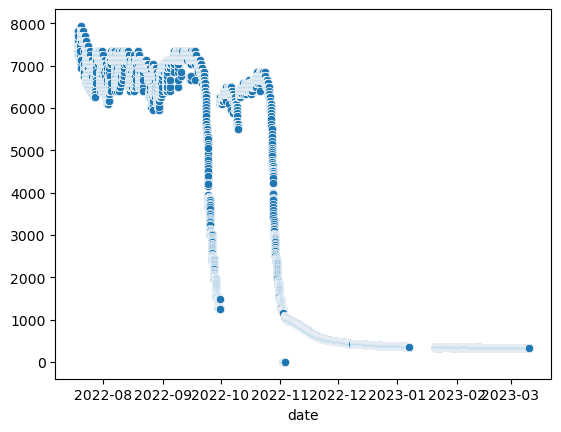

In [324]:
sns.scatterplot(ts)

In [79]:
# import cufflinks as cf

In [326]:
# df_filtered = df_2.loc[df_2['pm2'] >= 0]
df_1.iplot(kind='line', x='ttime', y='sm')

In [327]:
dfnew=df_2.copy()

In [328]:
dfnew['date']= pd.to_datetime(dfnew['ttime'])
dfnew

ttime   pm1   pm2    pm3   am      sm      lum   temp  \
0      2022-07-18 15:39:58  0.83  0.00   0.00  0.0  7463.0   6547.0  23.02   
1      2022-07-18 15:44:55  1.39  0.00   0.00  0.0  7576.0  10249.0  23.47   
2      2022-07-18 15:49:55  1.95  0.00   0.00  0.0  7576.0  12636.0  23.64   
3      2022-07-18 15:54:55  2.51  0.00   0.00  0.0  7463.0   8318.0  23.62   
4      2022-07-18 15:59:56  0.55  2.51   2.51  0.0  7463.0   4149.0  23.82   
...                    ...   ...   ...    ...  ...     ...      ...    ...   
20161  2023-03-10 08:59:16  0.55  1.11  27.38  3.2   327.0   6352.0  27.04   
20162  2023-03-10 09:27:12  1.11  1.11  27.38  3.2   327.0   7057.0  28.53   
20163  2023-03-10 09:55:12  1.67  1.11  27.38  4.8   327.0   7661.0  30.07   
20164  2023-03-10 10:23:12  0.55  1.67  27.93  4.0   327.0   8386.0  31.55   
20165  2023-03-10 10:51:14  1.11  1.67  27.93  2.4   328.0   8954.0  32.68   

        humd      pres                date  
0      90.57  92849.25 2022-07-18 15:39:58  
1      88.37  92848.31 2022-07-18 15:44:55  
2      85.26  92844.82 2022-07-18 15:49:55  
3      85.93  92834.94 2022-07-18 15:54:55  
4      86.06  92815.25 2022-07-18 15:59:56  
...      ...       ...                 ...  
20161  32.24  93560.72 2023-03-10 08:59:16  
20162  28.69  93574.12 2023-03-10 09:27:12  
20163  24.39  93571.75 2023-03-10 09:55:12  
20164  22.99  93558.36 2023-03-10 10:23:12  
20165  20.85  93541.99 2023-03-10 10:51:14  

[20166 rows x 11 columns]

In [329]:
dfnew = dfnew.loc[(dfnew['date'] < '2022-09-21') | (dfnew['date'] > '2022-10-3')]

In [330]:
dfnew.iplot(kind='line', x='ttime', y='sm')

In [331]:
dfnew = dfnew.loc[(dfnew['date'] < '2022-11-2') | (dfnew['date'] > '2022-11-5')]


In [332]:
dfnew.iplot(kind='line', x='ttime', y='sm')

In [333]:
df_before_october=dfnew.loc[(dfnew['date'] < '2022-10-26') ]
df_before_october.iplot(kind='line', x='ttime', y='sm')

In [334]:
from sklearn.model_selection import train_test_split

X = df_before_october.drop(['date','sm','ttime'],axis=1)
y = df_before_october['sm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X_train,y_train)
predictions = lm1.predict(X_test)

## Plots
# plt.scatter(y_test,predictions)

#  Evaluation Metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 303.234483416069
Root Mean Squared Error: 359.5933421295925


In [335]:
dfnew_after_october=dfnew.loc[(dfnew['date'] > '2022-12-02') ]
dfnew_after_october.iplot(kind='line', x='ttime', y='sm')

In [336]:
from sklearn.model_selection import train_test_split

X = dfnew_after_october.drop(['date','sm','ttime'],axis=1)
y = dfnew_after_october['sm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X_train,y_train)
predictions = lm1.predict(X_test)

## Plots
# plt.scatter(y_test,predictions)

#  Evaluation Metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 10.604802311268724
Root Mean Squared Error: 13.884533752371091


In [337]:

one_day=dfnew_after_october.loc[(dfnew_after_october['date']  > '2023-03-10') & (dfnew_after_october['date']  < '2023-03-11') ]


In [338]:
one_day


ttime   pm1   pm2    pm3   am     sm     lum   temp  \
20143  2023-03-10 00:13:52  0.55  1.11  27.93  4.8  328.0     1.0  21.98   
20144  2023-03-10 00:40:52  1.11  1.11  27.93  0.8  328.0     3.0  21.59   
20145  2023-03-10 01:07:54  0.55  1.11  27.38  0.0  328.0     3.0  20.04   
20146  2023-03-10 01:34:52  1.11  1.11  27.38  0.8  328.0     4.0  20.46   
20147  2023-03-10 02:01:54  0.55  1.11  27.38  0.0  328.0     2.0  20.22   
20148  2023-03-10 02:28:53  1.11  1.11  27.38  0.0  327.0     3.0  19.97   
20149  2023-03-10 03:24:06  0.55  1.67  27.93  0.8  327.0     1.0  20.22   
20150  2023-03-10 03:51:11  1.11  1.67  27.93  0.0  327.0     4.0  19.57   
20151  2023-03-10 04:19:13  0.55  1.11  27.93  0.0  327.0     4.0  17.12   
20152  2023-03-10 04:47:12  1.11  1.11  27.93  0.0  326.0     1.0  15.51   
20153  2023-03-10 05:15:12  0.55  1.11  27.93  0.0  326.0     1.0  14.85   
20154  2023-03-10 05:43:14  1.11  1.11  27.93  0.0  326.0     1.0  14.85   
20155  2023-03-10 06:11:12  0.55  1.11  27.93  0.0  325.0     1.0  15.31   
20156  2023-03-10 06:39:12  1.11  1.11  27.93  0.0  325.0   302.0  14.72   
20157  2023-03-10 07:07:12  0.55  1.11  27.93  0.0  325.0  1558.0  15.26   
20158  2023-03-10 07:35:16  1.11  1.11  27.93  0.0  325.0  2911.0  19.53   
20159  2023-03-10 08:03:13  0.55  1.11  27.38  0.8  325.0  4321.0  22.48   
20160  2023-03-10 08:31:12  1.11  1.11  27.38  1.6  326.0  5425.0  24.70   
20161  2023-03-10 08:59:16  0.55  1.11  27.38  3.2  327.0  6352.0  27.04   
20162  2023-03-10 09:27:12  1.11  1.11  27.38  3.2  327.0  7057.0  28.53   
20163  2023-03-10 09:55:12  1.67  1.11  27.38  4.8  327.0  7661.0  30.07   
20164  2023-03-10 10:23:12  0.55  1.67  27.93  4.0  327.0  8386.0  31.55   
20165  2023-03-10 10:51:14  1.11  1.67  27.93  2.4  328.0  8954.0  32.68   

        humd      pres                date  
20143  33.29  93458.80 2023-03-10 00:13:52  
20144  34.10  93441.14 2023-03-10 00:40:52  
20145  36.57  93407.37 2023-03-10 01:07:54  
20146  36.37  93395.05 2023-03-10 01:34:52  
20147  37.93  93393.34 2023-03-10 02:01:54  
20148  39.50  93370.92 2023-03-10 02:28:53  
20149  38.91  93380.36 2023-03-10 03:24:06  
20150  39.86  93381.14 2023-03-10 03:51:11  
20151  46.37  93379.55 2023-03-10 04:19:13  
20152  52.42  93366.40 2023-03-10 04:47:12  
20153  53.20  93366.05 2023-03-10 05:15:12  
20154  53.23  93372.22 2023-03-10 05:43:14  
20155  52.24  93384.50 2023-03-10 06:11:12  
20156  54.79  93423.65 2023-03-10 06:39:12  
20157  54.74  93447.86 2023-03-10 07:07:12  
20158  44.22  93480.82 2023-03-10 07:35:16  
20159  39.49  93513.03 2023-03-10 08:03:13  
20160  35.81  93546.17 2023-03-10 08:31:12  
20161  32.24  93560.72 2023-03-10 08:59:16  
20162  28.69  93574.12 2023-03-10 09:27:12  
20163  24.39  93571.75 2023-03-10 09:55:12  
20164  22.99  93558.36 2023-03-10 10:23:12  
20165  20.85  93541.99 2023-03-10 10:51:14

In [339]:
one_day.iplot(kind='line', x='ttime', y='sm')

In [340]:
# LSTM Prediction Pre October
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

input_fetaure_index=[2,4,5]
no_of_features= len(input_fetaure_index)
target_index = 4
in_days=40

In [341]:
df = df_before_october.drop(['ttime','date'],axis=1)

fraction = math.ceil(len(df) * .75)

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(df)

train_data = scaled_data[0:fraction , : ]

In [342]:
x_train=[]
y_train = []
for i in range(in_days, len(train_data)):
    x_train.append(train_data[i-in_days:i,input_fetaure_index])
    y_train.append(train_data[i,target_index])
    
    
    
x_train, y_train = np.array(x_train), np.array(y_train)   

In [343]:
model = Sequential()
model.add(LSTM(units = 64, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.5))

model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 64))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 30, batch_size = 500)

Epoch 1/30
17/17 [==============================] - 14s 353ms/step - loss: 0.0678
Epoch 2/30
17/17 [==============================] - 6s 378ms/step - loss: 0.0174
Epoch 3/30
17/17 [==============================] - 6s 353ms/step - loss: 0.0132
Epoch 4/30
17/17 [==============================] - 6s 330ms/step - loss: 0.0124
Epoch 5/30
17/17 [==============================] - 7s 395ms/step - loss: 0.0116
Epoch 6/30
17/17 [==============================] - 7s 418ms/step - loss: 0.0109
Epoch 7/30
17/17 [==============================] - 8s 447ms/step - loss: 0.0105
Epoch 8/30
17/17 [==============================] - 7s 393ms/step - loss: 0.0105
Epoch 9/30
17/17 [==============================] - 6s 372ms/step - loss: 0.0102
Epoch 10/30
17/17 [==============================] - 6s 368ms/step - loss: 0.0099
Epoch 11/30
17/17 [==============================] - 7s 390ms/step - loss: 0.0096
Epoch 12/30
17/17 [==============================] - 6s 363ms/step - loss: 0.0095
Epoch 13/30
17/17 [=====

In [344]:
test_data = scaled_data[fraction - in_days: , : ]


x_test = []
y_test = df_before_october.drop(['ttime','date'],axis=1)['sm'].to_numpy()[fraction : ]
for i in range(in_days,len(test_data)):
    x_test.append(test_data[i-in_days:i,input_fetaure_index])

    
    
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],no_of_features))

In [345]:
predictions = model.predict(x_test)

temp = df_before_october.drop(['ttime','date'],axis=1).values
predictions = np.concatenate((temp[fraction:, :target_index],predictions, temp[fraction:, target_index+1:]), axis=1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, target_index]

88/88 [==============================] - 8s 37ms/step


Mean Squared Error: 57.63302084120656


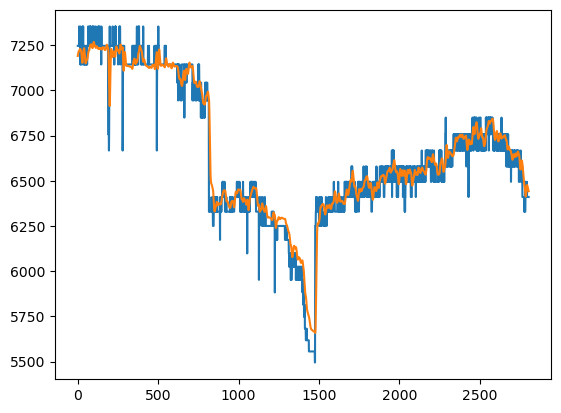

In [346]:
print('Mean Squared Error:', metrics.mean_absolute_error(y_test, predictions))

# plt.ylim()
plt.plot(y_test)
plt.plot(predictions)

<h1> BEST MODEL SO FAR  </h1>


In [347]:
# LSTM Post October
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

input_fetaure_index=[2,4,5]
no_of_features= len(input_fetaure_index)
target_index = 4
in_days=40

In [348]:
df = dfnew_after_october.drop(['ttime','date'],axis=1)

fraction = math.ceil(len(df) * .75)

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(df)

train_data = scaled_data[0:fraction , : ]

In [349]:
x_train=[]
y_train = []
for i in range(in_days, len(train_data)):
    x_train.append(train_data[i-in_days:i,input_fetaure_index])
    y_train.append(train_data[i,target_index])
    
    
    
x_train, y_train = np.array(x_train), np.array(y_train)   

In [350]:
model = Sequential()
model.add(LSTM(units = 64, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.5))

model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 64))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 30, batch_size = 500)

Epoch 1/30
8/8 [==============================] - 10s 302ms/step - loss: 0.0615
Epoch 2/30
8/8 [==============================] - 3s 365ms/step - loss: 0.0183
Epoch 3/30
8/8 [==============================] - 3s 346ms/step - loss: 0.0084
Epoch 4/30
8/8 [==============================] - 3s 367ms/step - loss: 0.0046
Epoch 5/30
8/8 [==============================] - 3s 352ms/step - loss: 0.0036
Epoch 6/30
8/8 [==============================] - 3s 372ms/step - loss: 0.0030
Epoch 7/30
8/8 [==============================] - 3s 388ms/step - loss: 0.0030
Epoch 8/30
8/8 [==============================] - 3s 392ms/step - loss: 0.0027
Epoch 9/30
8/8 [==============================] - 4s 500ms/step - loss: 0.0027
Epoch 10/30
8/8 [==============================] - 4s 436ms/step - loss: 0.0024
Epoch 11/30
8/8 [==============================] - 3s 375ms/step - loss: 0.0024
Epoch 12/30
8/8 [==============================] - 3s 348ms/step - loss: 0.0024
Epoch 13/30
8/8 [==============================]

In [351]:
test_data = scaled_data[fraction - in_days: , : ]


x_test = []
y_test = dfnew_after_october.drop(['ttime','date'],axis=1)['sm'].to_numpy()[fraction : ]
for i in range(in_days,len(test_data)):
    x_test.append(test_data[i-in_days:i,input_fetaure_index])

    
    
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],no_of_features))

In [352]:
predictions = model.predict(x_test)

temp = dfnew_after_october.drop(['ttime','date'],axis=1).values
predictions = np.concatenate((temp[fraction:, :target_index],predictions, temp[fraction:, target_index+1:]), axis=1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, target_index]

40/40 [==============================] - 3s 22ms/step


Mean Absolute Error: 0.8928213413528083


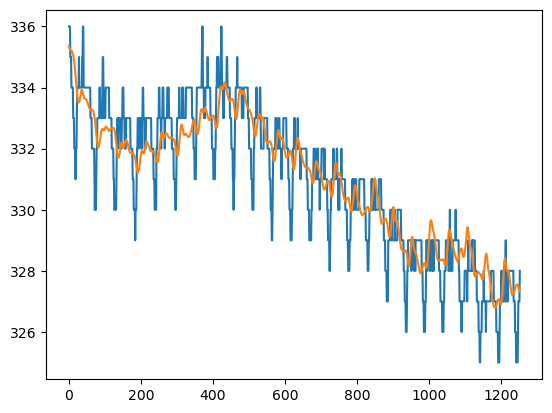

In [353]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))


# plt.ylim()
plt.plot(y_test)
plt.plot(predictions)

In [354]:
dfnew_after_october['sm'].iloc[fraction:]

18914    336.0
18915    336.0
18916    336.0
18917    336.0
18918    335.0
         ...  
20161    327.0
20162    327.0
20163    327.0
20164    327.0
20165    328.0
Name: sm, Length: 1252, dtype: float64

In [355]:
predictions

array([335.3617129 , 335.3066227 , 335.26471813, ..., 327.38372676,
       327.35035746, 327.33619187])

In [356]:
see = pd.DataFrame({'arr1': predictions, 'arr2': dfnew_after_october['sm'].iloc[fraction:].to_numpy()})
cf.go_offline()
see.iplot()

In [357]:
# Delete Mischevious data and lesss goo..

guess=df_2.copy()
guess['date']= pd.to_datetime(guess['ttime'])


In [358]:
guess = guess.loc[(guess['date'] < '2022-09-21') | (guess['date'] > '2022-10-3')]

In [359]:
guess = guess.loc[(guess['date'] < '2022-11-2') | (guess['date'] > '2022-11-5')]


In [360]:
guess.iplot(kind='line', x='ttime', y='sm')

In [361]:
# LSTM Prediction Pre October
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

input_fetaure_index=[2,4,5]
no_of_features= len(input_fetaure_index)
target_index = 4
in_days=40

In [362]:
df = guess.drop(['ttime','date'],axis=1)

fraction = math.ceil(len(df) * .75)

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(df)

train_data = scaled_data[0:fraction , : ]

In [363]:
x_train=[]
y_train = []
for i in range(in_days, len(train_data)):
    x_train.append(train_data[i-in_days:i,input_fetaure_index])
    y_train.append(train_data[i,target_index])
    
    
    
x_train, y_train = np.array(x_train), np.array(y_train)   

In [364]:
model = Sequential()
model.add(LSTM(units = 64, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.5))

model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 64))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 5, batch_size = 500)

Epoch 1/5
29/29 [==============================] - 18s 361ms/step - loss: 0.0585
Epoch 2/5
29/29 [==============================] - 11s 365ms/step - loss: 0.0097
Epoch 3/5
29/29 [==============================] - 11s 384ms/step - loss: 0.0076
Epoch 4/5
29/29 [==============================] - 12s 412ms/step - loss: 0.0066
Epoch 5/5
29/29 [==============================] - 13s 434ms/step - loss: 0.0062


In [365]:
test_data = scaled_data[fraction - in_days: , : ]


x_test = []
y_test = guess.drop(['ttime','date'],axis=1)['sm'].to_numpy()[fraction : ]
for i in range(in_days,len(test_data)):
    x_test.append(test_data[i-in_days:i,input_fetaure_index])

    
    
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],no_of_features))

In [366]:
predictions = model.predict(x_test)

temp = guess.drop(['ttime','date'],axis=1).values
predictions = np.concatenate((temp[fraction:, :target_index],predictions, temp[fraction:, target_index+1:]), axis=1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, target_index]

147/147 [==============================] - 7s 30ms/step


In [367]:
see = pd.DataFrame({'Predictions': predictions, 'Actual': y_test})
cf.go_offline()
see.iplot()

In [368]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))


Mean Absolute Error: 121.87994914748592


In [369]:
y_test

array([441., 440., 441., ..., 327., 327., 328.])

In [370]:
predictions

array([338.24122356, 336.65201727, 334.85599694, ..., 209.1043528 ,
       209.92266232, 210.75858149])